In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Task1. Data set 설명
- 비트코인의 가격예측(financial data만!)
- 예측을 최대한 해보고
- 만약 안 된다면? 실물변수 추가
- 주요 궁금증: crypto는 실물경제와 상관이 있는가?
- FRED

```
BTC: btc price
DFF:federal funds effective rate
BBB: BBB firm interest rate
SP500: SP500 index
SP5003MONVOl: SP500 3month voltality
DAA: AA firm interest rate
WTI: WTI oil price
EFFR: effective federal funds rate
OBFR: overnight bank funding rate
T10Y2Y: 10-Year Treasury - 2Y
FORWARD1
FORWARD10
TERMPREMIUM10: term premium on 10 year zero coupon bond

```

In [31]:
file1 = r"C:\Users\kihun\Desktop\EPOCH\mini_project\dataset\NEW1.csv"
file2 = r"C:\Users\kihun\Desktop\EPOCH\mini_project\dataset\NEW2.csv"
file3 = r"C:\Users\kihun\Desktop\EPOCH\mini_project\dataset\NEW3.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# 날짜 컬럼을 기준으로 병합 (outer join을 사용하여 모든 날짜 포함)
df = pd.merge(df1, df2, on='observation_date', how='inner')
df = pd.merge(df, df3, on='observation_date', how='inner')

print(df.head())

  observation_date     BTC   DFF   BBB    SP500  SP5003MONVOL  DAAA    WTI  \
0       2016-03-01  433.08  0.36  4.39  1978.35         20.28  3.91  34.39   
1       2016-03-02  420.39  0.37  4.37  1986.45         19.92  3.90  34.57   
2       2016-03-03  418.80  0.37  4.33  1993.40         19.49  3.89  34.56   
3       2016-03-04  407.35  0.36  4.34  1999.99         19.63  3.92  35.91   
4       2016-03-07  412.21  0.36  4.32  2001.76         19.90  3.91  37.90   

   EFFR  OBFR  T10Y2Y  FORWARD1  FORWARD10  TERMPREMIUM10  
0  0.36  0.37    0.98    0.9302     3.1401        -0.0103  
1  0.37  0.37    0.99    0.9546     3.1719         0.0068  
2  0.37  0.37    0.98    0.9469     3.1636         0.0105  
3  0.36  0.37    1.00    0.9863     3.2000         0.0355  
4  0.36  0.37    1.00    1.0200     3.2255         0.0518  


In [32]:
df.head()

,observation_date,BTC,DFF,BBB,SP500,SP5003MONVOL,DAAA,WTI,EFFR,OBFR,T10Y2Y,FORWARD1,FORWARD10,TERMPREMIUM10
0,2016-03-01,433.08,0.36,4.39,1978.35,20.28,3.91,34.39,0.36,0.37,0.98,0.9302,3.1401,-0.0103
1,2016-03-02,420.39,0.37,4.37,1986.45,19.92,3.90,34.57,0.37,0.37,0.99,0.9546,3.1719,0.0068
2,2016-03-03,418.80,0.37,4.33,1993.40,19.49,3.89,34.56,0.37,0.37,0.98,0.9469,3.1636,0.0105
3,2016-03-04,407.35,0.36,4.34,1999.99,19.63,3.92,35.91,0.36,0.37,1.00,0.9863,3.2000,0.0355
4,2016-03-07,412.21,0.36,4.32,2001.76,19.90,3.91,37.90,0.36,0.37,1.00,1.0200,3.2255,0.0518


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  2359 non-null   object 
 1   BTC               2358 non-null   float64
 2   DFF               2358 non-null   float64
 3   BBB               2331 non-null   float64
 4   SP500             2274 non-null   float64
 5   SP5003MONVOL      2271 non-null   float64
 6   DAAA              2260 non-null   float64
 7   WTI               2259 non-null   float64
 8   EFFR              2270 non-null   float64
 9   OBFR              2270 non-null   float64
 10  T10Y2Y            2261 non-null   float64
 11  FORWARD1          2256 non-null   float64
 12  FORWARD10         2256 non-null   float64
 13  TERMPREMIUM10     2256 non-null   float64
dtypes: float64(13), object(1)
memory usage: 258.1+ KB


In [34]:
print(df.isnull().sum())
# 결측치가 다소 있음... 그냥 빼주자
df = df.dropna()
df = df.drop('DFF', axis = 1)

observation_date      0
BTC                   1
DFF                   1
BBB                  28
SP500                85
SP5003MONVOL         88
DAAA                 99
WTI                 100
EFFR                 89
OBFR                 89
T10Y2Y               98
FORWARD1            103
FORWARD10           103
TERMPREMIUM10       103
dtype: int64


In [35]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2242 entries, 0 to 2353
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  2242 non-null   object 
 1   BTC               2242 non-null   float64
 2   BBB               2242 non-null   float64
 3   SP500             2242 non-null   float64
 4   SP5003MONVOL      2242 non-null   float64
 5   DAAA              2242 non-null   float64
 6   WTI               2242 non-null   float64
 7   EFFR              2242 non-null   float64
 8   OBFR              2242 non-null   float64
 9   T10Y2Y            2242 non-null   float64
 10  FORWARD1          2242 non-null   float64
 11  FORWARD10         2242 non-null   float64
 12  TERMPREMIUM10     2242 non-null   float64
dtypes: float64(12), object(1)
memory usage: 245.2+ KB
None
observation_date    0
BTC                 0
BBB                 0
SP500               0
SP5003MONVOL        0
DAAA                0
W

# Task2. 기초 통계 확인

In [36]:
df.describe()

,BTC,BBB,SP500,SP5003MONVOL,DAAA,WTI,EFFR,OBFR,T10Y2Y,FORWARD1,FORWARD10,TERMPREMIUM10
count,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000
mean,24197.360245,4.090629,3576.539255,20.340687,3.787293,64.367440,2.039750,2.032917,0.357716,2.290163,3.490152,0.054054
std,24388.225083,1.202937,1080.215890,6.693599,0.894495,18.181633,1.897887,1.896660,0.600296,1.582525,0.911761,0.313772
min,407.350000,2.050000,1978.350000,11.850000,2.010000,-36.980000,0.040000,0.030000,-1.080000,0.086900,1.583800,-0.658700
25%,6272.382500,3.280000,2695.307500,15.600000,3.040000,50.847500,0.370000,0.370000,0.030000,0.926750,2.852425,-0.133500
50%,12016.150000,3.860000,3366.080000,18.425000,3.790000,64.450000,1.550000,1.545000,0.315000,1.894400,3.451550,0.081700
75%,39165.012500,5.280000,4365.217500,23.522500,4.510000,76.105000,3.830000,3.820000,0.840000,3.855850,3.933725,0.289225
max,106136.990000,6.720000,6144.150000,72.980000,5.800000,123.640000,5.330000,5.330000,1.590000,5.161500,5.700400,0.813100


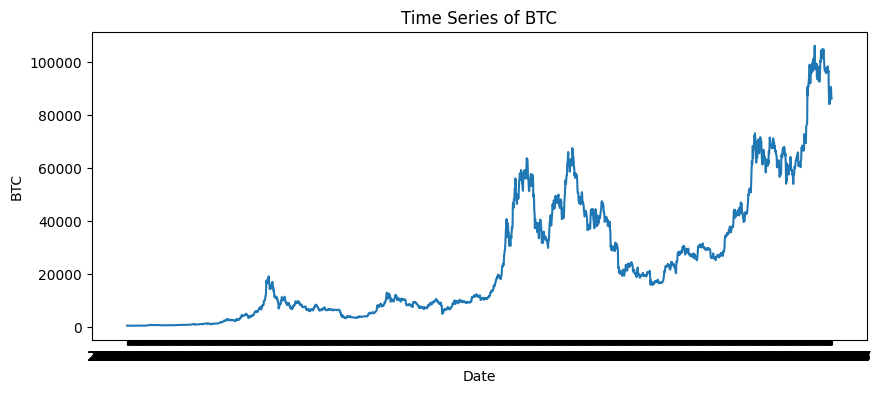

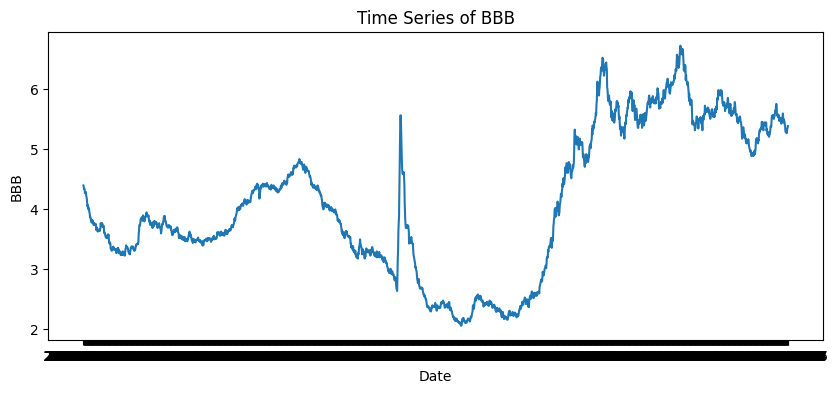

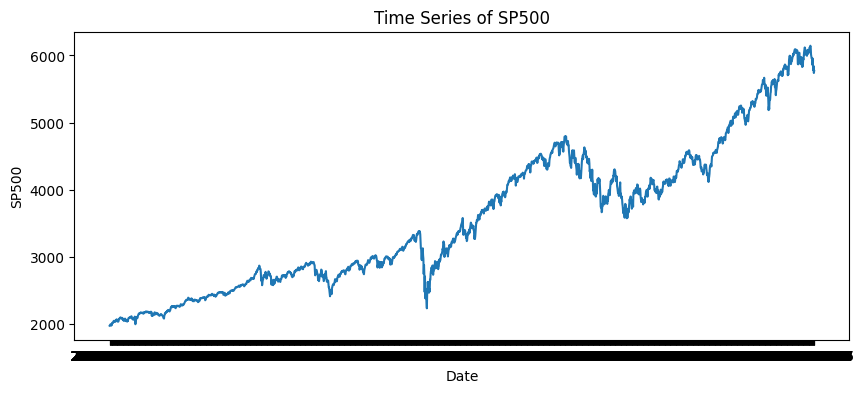

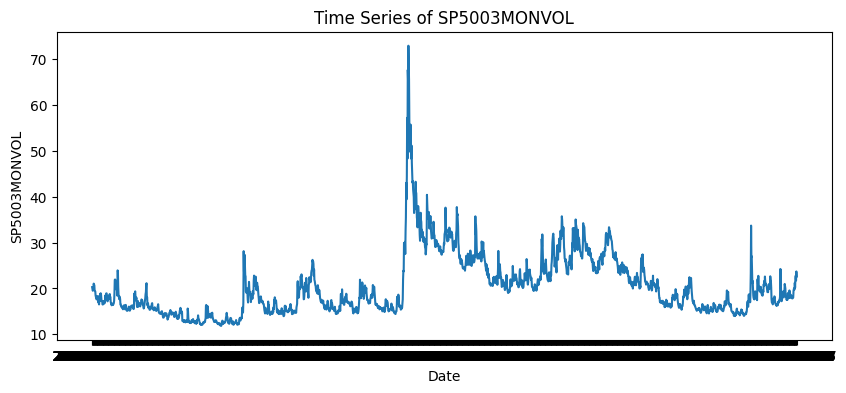

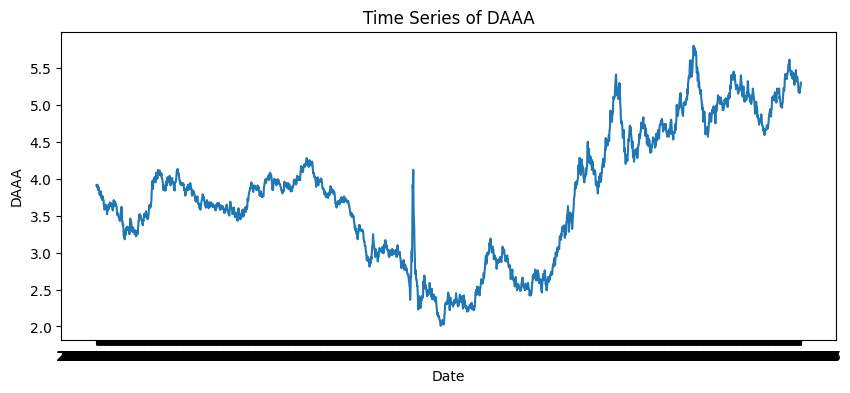

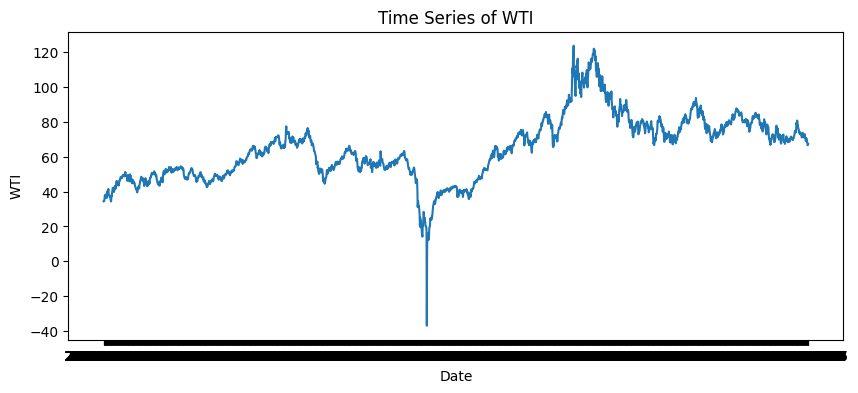

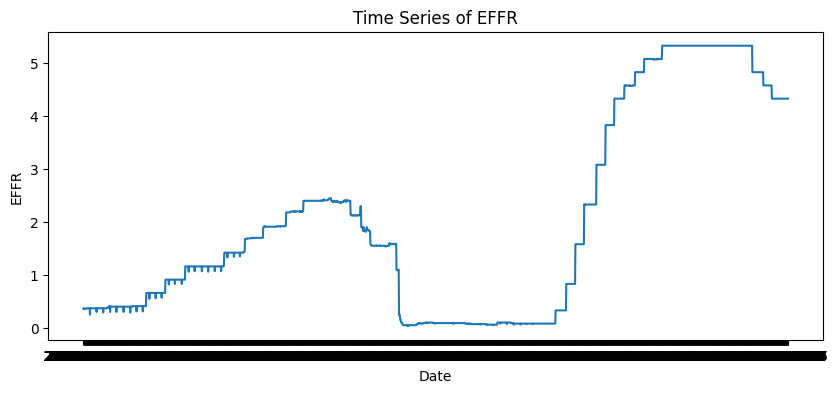

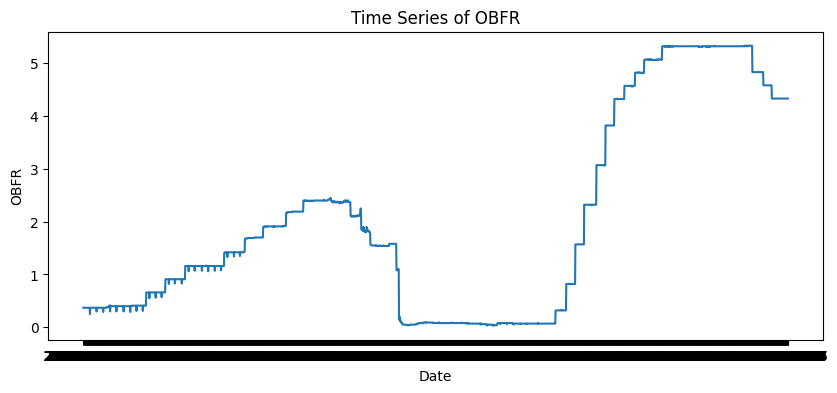

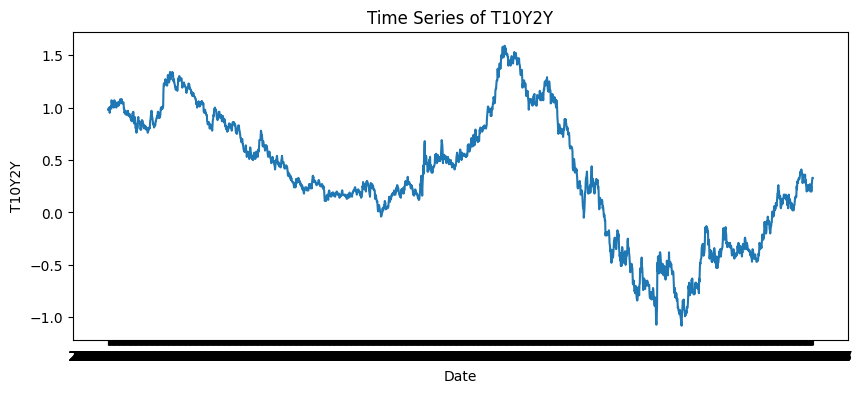

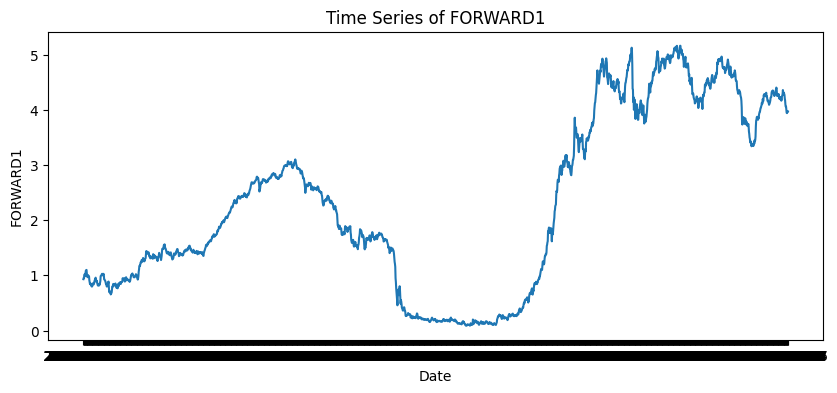

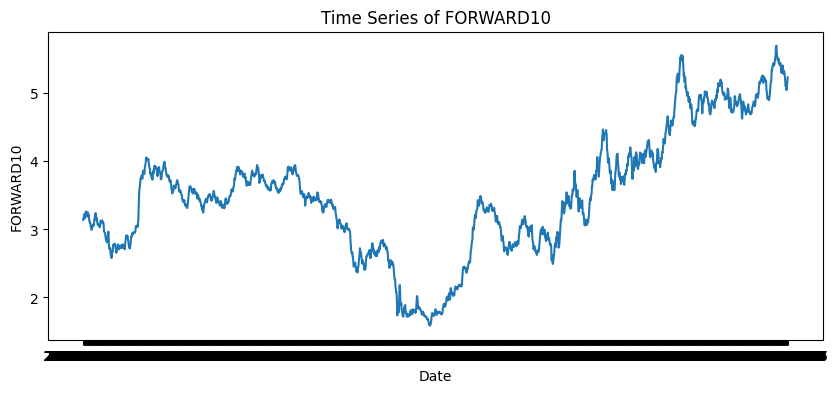

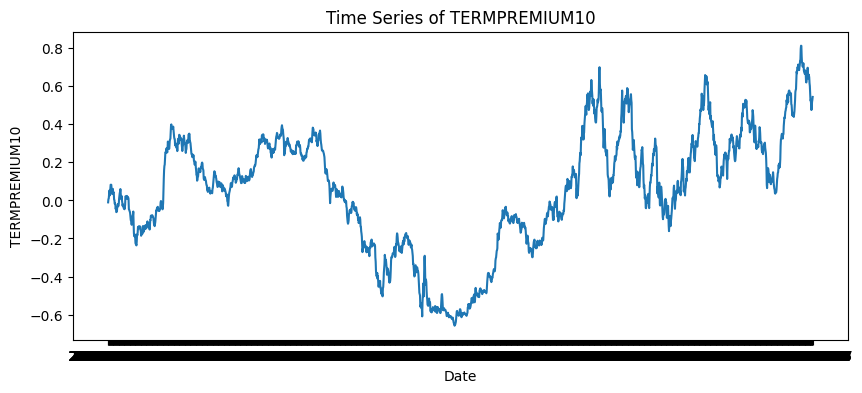

In [37]:
# observation_date를 인덱스로 설정 (이미 datetime 형식이라 가정)
df.set_index('observation_date', inplace=True)

# 각 컬럼에 대해 시계열 선 그래프 그리기
for col in df.columns:
    plt.figure(figsize=(10,4))
    plt.plot(df.index, df[col])
    plt.title(f'Time Series of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()

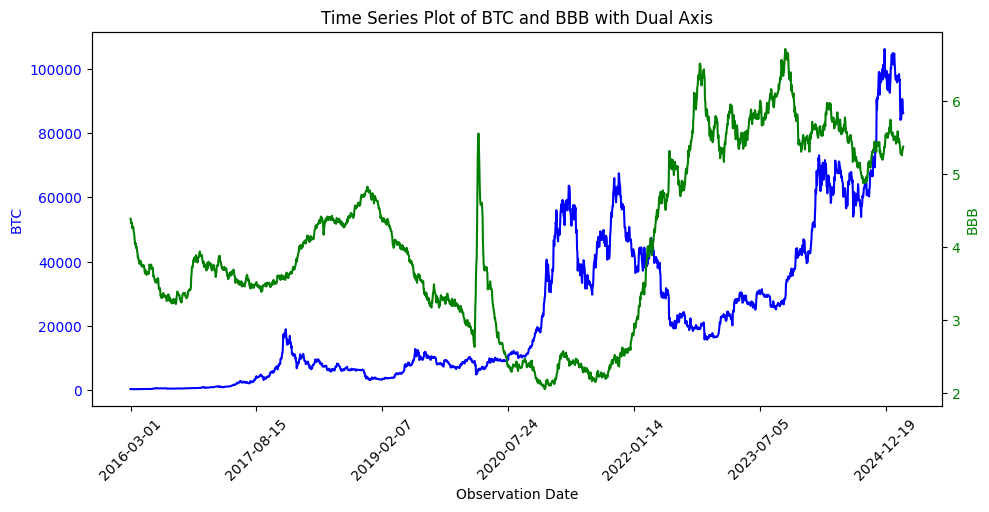

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# BTC 데이터 플롯 (왼쪽 y축)
ax1.plot(df.index, df['BTC'], 'b-', label='BTC')
ax1.set_xlabel('Observation Date')
ax1.set_ylabel('BTC', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# x축 tick을 365일 간격으로 설정
ticks = df.index[::365]
# 각 tick을 datetime 형식으로 변환 후 문자열 포맷 적용
tick_labels = [pd.to_datetime(t).strftime('%Y-%m-%d') for t in ticks]
ax1.set_xticks(ticks)
ax1.set_xticklabels(tick_labels, rotation=45)

# BBB 데이터 플롯 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(df.index, df['BBB'], 'g-', label='BBB')
ax2.set_ylabel('BBB', color='g')
ax2.tick_params(axis='y', labelcolor='g')

fig.tight_layout()
plt.title('Time Series Plot of BTC and BBB with Dual Axis')
plt.show()

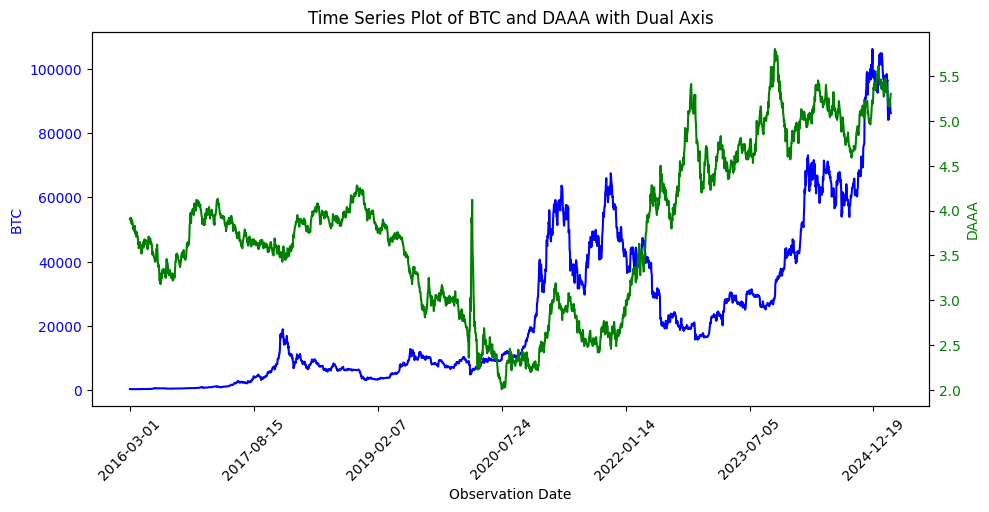

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df.index, df['BTC'], 'b-', label='BTC')
ax1.set_xlabel('Observation Date')
ax1.set_ylabel('BTC', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# x축 tick을 365일 간격으로 설정
ticks = df.index[::365]
# 각 tick을 datetime 형식으로 변환 후 문자열 포맷 적용
tick_labels = [pd.to_datetime(t).strftime('%Y-%m-%d') for t in ticks]
ax1.set_xticks(ticks)
ax1.set_xticklabels(tick_labels, rotation=45)

ax2 = ax1.twinx()
ax2.plot(df.index, df['DAAA'], 'g-', label='DAAA')
ax2.set_ylabel('DAAA', color='g')
ax2.tick_params(axis='y', labelcolor='g')

fig.tight_layout()
plt.title('Time Series Plot of BTC and DAAA with Dual Axis')
plt.show()

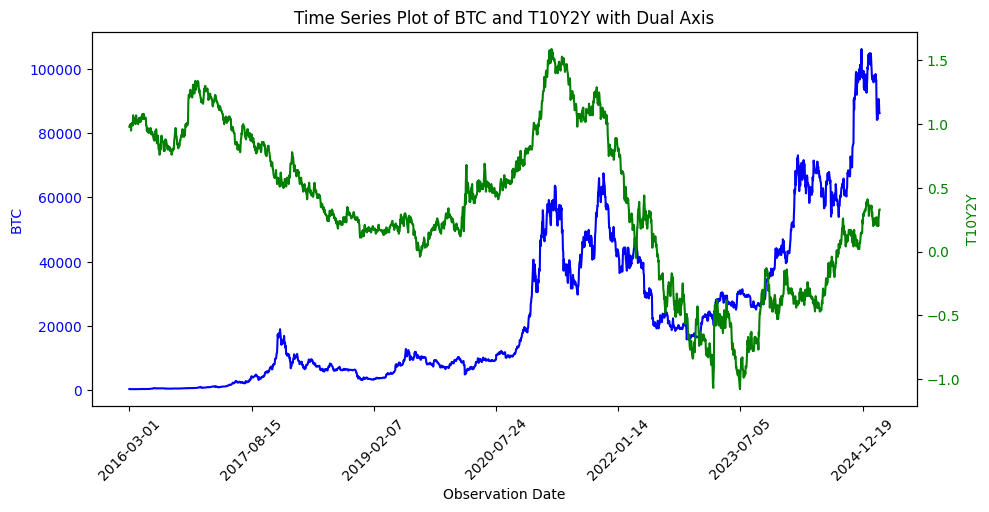

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df.index, df['BTC'], 'b-', label='BTC')
ax1.set_xlabel('Observation Date')
ax1.set_ylabel('BTC', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# x축 tick을 365일 간격으로 설정
ticks = df.index[::365]
# 각 tick을 datetime 형식으로 변환 후 문자열 포맷 적용
tick_labels = [pd.to_datetime(t).strftime('%Y-%m-%d') for t in ticks]
ax1.set_xticks(ticks)
ax1.set_xticklabels(tick_labels, rotation=45)

ax2 = ax1.twinx()
ax2.plot(df.index, df['T10Y2Y'], 'g-', label='T10Y2Y')
ax2.set_ylabel('T10Y2Y', color='g')
ax2.tick_params(axis='y', labelcolor='g')


fig.tight_layout()
plt.title('Time Series Plot of BTC and T10Y2Y with Dual Axis')
plt.show()

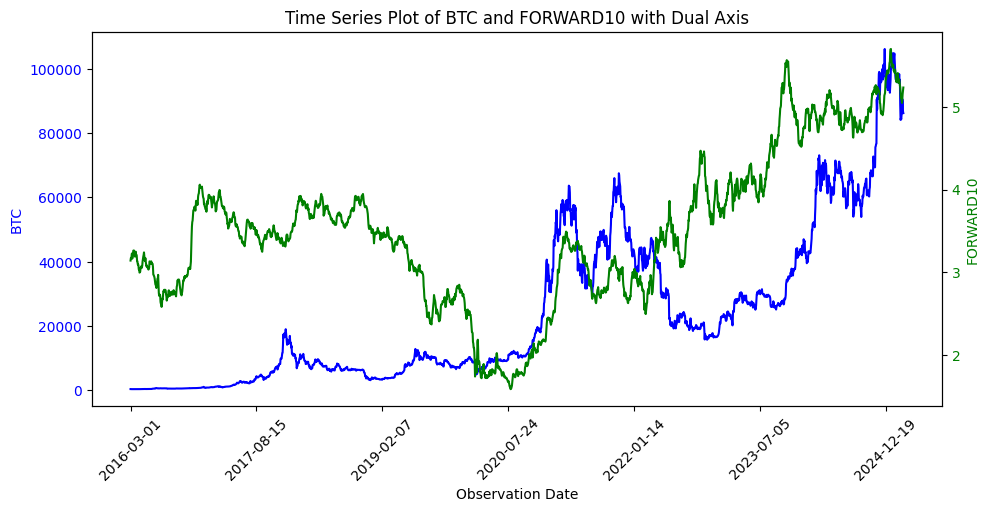

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df.index, df['BTC'], 'b-', label='BTC')
ax1.set_xlabel('Observation Date')
ax1.set_ylabel('BTC', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# x축 tick을 365일 간격으로 설정
ticks = df.index[::365]
# 각 tick을 datetime 형식으로 변환 후 문자열 포맷 적용
tick_labels = [pd.to_datetime(t).strftime('%Y-%m-%d') for t in ticks]
ax1.set_xticks(ticks)
ax1.set_xticklabels(tick_labels, rotation=45)

ax2 = ax1.twinx()
ax2.plot(df.index, df['FORWARD10'], 'g-', label='FORWARD10')
ax2.set_ylabel('FORWARD10', color='g')
ax2.tick_params(axis='y', labelcolor='g')

fig.tight_layout()
plt.title('Time Series Plot of BTC and FORWARD10 with Dual Axis')
plt.show()

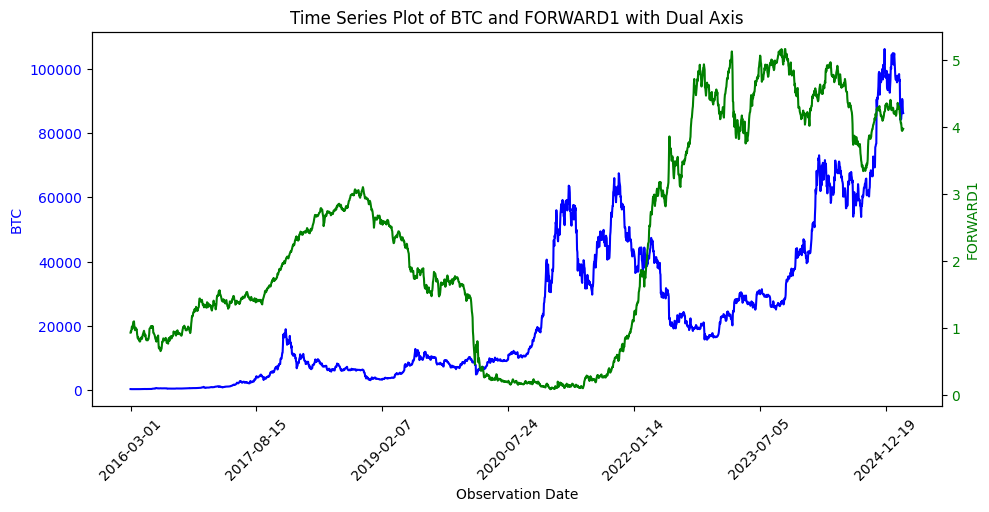

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df.index, df['BTC'], 'b-', label='BTC')
ax1.set_xlabel('Observation Date')
ax1.set_ylabel('BTC', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# x축 tick을 365일 간격으로 설정
ticks = df.index[::365]
# 각 tick을 datetime 형식으로 변환 후 문자열 포맷 적용
tick_labels = [pd.to_datetime(t).strftime('%Y-%m-%d') for t in ticks]
ax1.set_xticks(ticks)
ax1.set_xticklabels(tick_labels, rotation=45)

ax2 = ax1.twinx()
ax2.plot(df.index, df['FORWARD1'], 'g-', label='FORWARD1')
ax2.set_ylabel('FORWARD1', color='g')
ax2.tick_params(axis='y', labelcolor='g')

fig.tight_layout()
plt.title('Time Series Plot of BTC and FORWARD1 with Dual Axis')
plt.show()

# Task3. 분석 목적 및 인사이트

- 중반부(2020년)까진 큰 연동성 발견 x
- 그러나 20년 이후로 회사채 금리 및 fed rate와 연동된 움직임 보임
- 특히 금리 스프레드가 20년 이후 급격히 하락 후 반등(경기 침체 예상 후 호황 예상) -> 비트코인도 동일 양상으로 움직임
- 시장 기대에 특히 민감하게 반응하는 것으로 보임 (금리 스프레드 - 투자자산 간 연관성 vs "" - 비트코인 간 연관성?)
- 단기 선도 이자율보단 장기 선도 이자율과 동행하는 움직임을 보임
- 단기선도이자율은 코로나 이후 급등 후 높게 형성, 시장이 지속적으로 호황 예상하는 중
- 장기 선도 이자율은 꾸준히 증가 중
- 선도 이자율 - 비트코인 가격 변동량(미분값)?

- 분석 목적
  1. 금융 변수만으로 비트코인의 움직임을 설명해보자
  2. 금리 스프레드, 선도가 등 시장 기대와 비트코인 움직임 간의 연관성 파악 (어느 정도인지 타 자산과 비교)
  3. 실물 변수, 특히 총공급 측면의 변수(유가)가 유의미한 설명력을 지닐 수 있는가? (모델 성능을 개선할 수 있는가?)

# Task4. 전처리 & 피쳐 엔지니어링

In [42]:
def compute_rsi(series, period=14):
    # 종가의 변화량 계산
    delta = series.diff()
    
    # 상승분과 하락분 분리
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    
    # 지정한 기간 동안의 평균 이득과 평균 손실 계산
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()
    
    # 상대 강도(RS) 계산
    rs = avg_gain / avg_loss
    
    # RSI 계산
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

df['RSI14'] = compute_rsi(df['BTC'], period=14)
df['RSI5'] = compute_rsi(df['BTC'], period=5)

In [43]:
# 우선 정규화 진행
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
columns_to_scale = df.columns  # 또는 변환 대상 컬럼 리스트를 지정
df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]),
                         index=df.index,
                         columns=columns_to_scale)

# 결과 확인
print(df_scaled.head())

                       BTC    BBB     SP500  SP5003MONVOL      DAAA       WTI  \
observation_date                                                                
2016-03-01       -0.352148  0.265 -0.831021      0.234143  0.081633 -1.190142   
2016-03-02       -0.352534  0.255 -0.826170      0.188703  0.074830 -1.183015   
2016-03-03       -0.352582  0.235 -0.822008      0.134427  0.068027 -1.183411   
2016-03-04       -0.352930  0.240 -0.818062      0.152098  0.088435 -1.129961   
2016-03-07       -0.352782  0.230 -0.817002      0.186179  0.081633 -1.051173   

                      EFFR     OBFR    T10Y2Y  FORWARD1  FORWARD10  \
observation_date                                                     
2016-03-01       -0.343931 -0.34058  0.820988 -0.329180  -0.288033   
2016-03-02       -0.341040 -0.34058  0.833333 -0.320849  -0.258624   
2016-03-03       -0.341040 -0.34058  0.820988 -0.323478  -0.266300   
2016-03-04       -0.343931 -0.34058  0.845679 -0.310027  -0.232637   
2016-03-07  

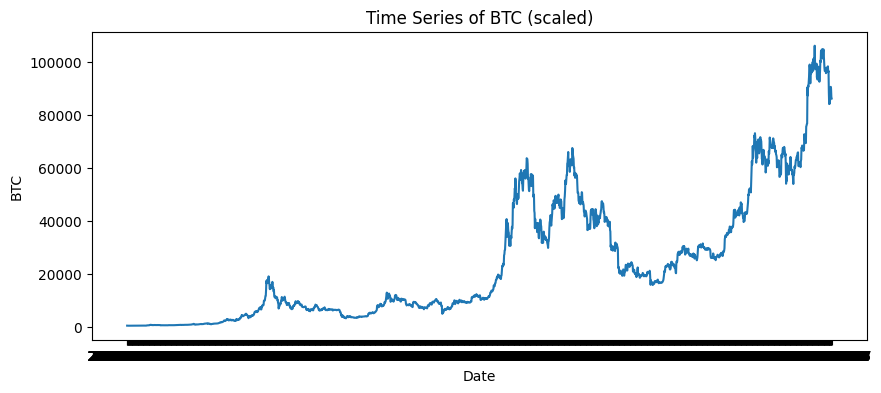

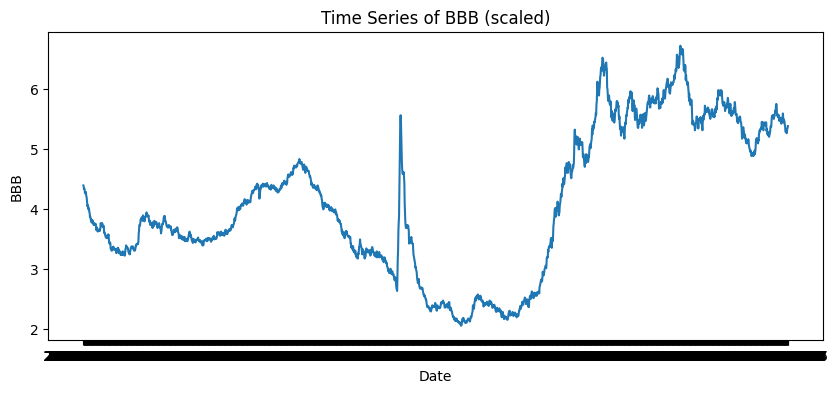

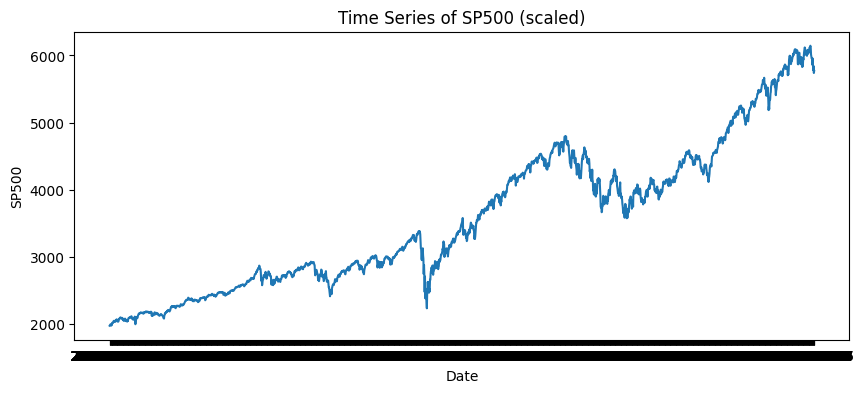

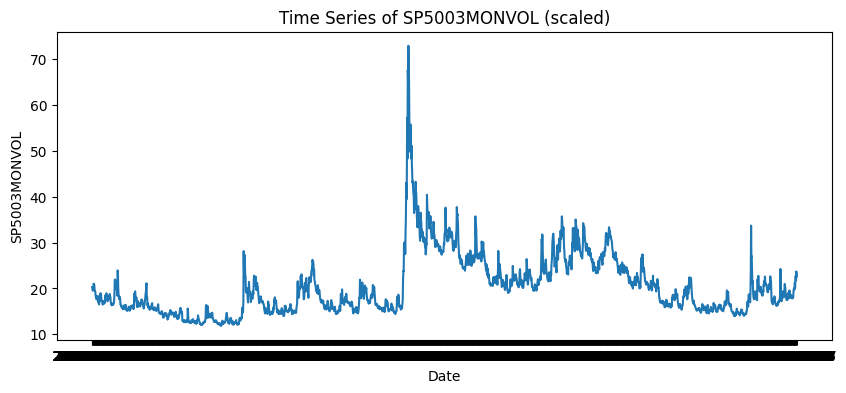

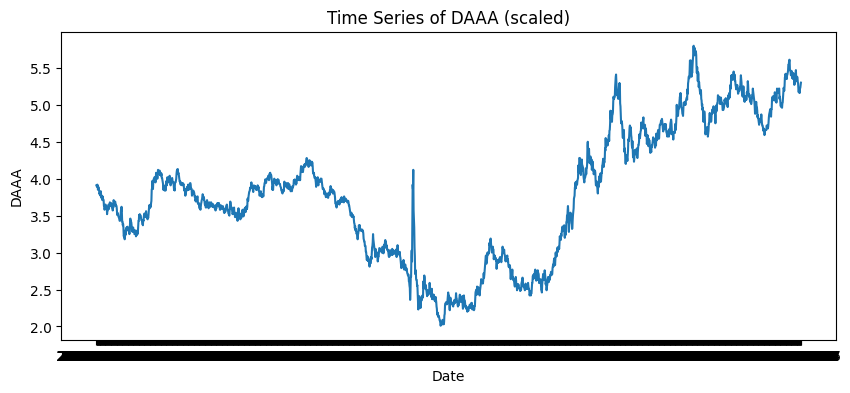

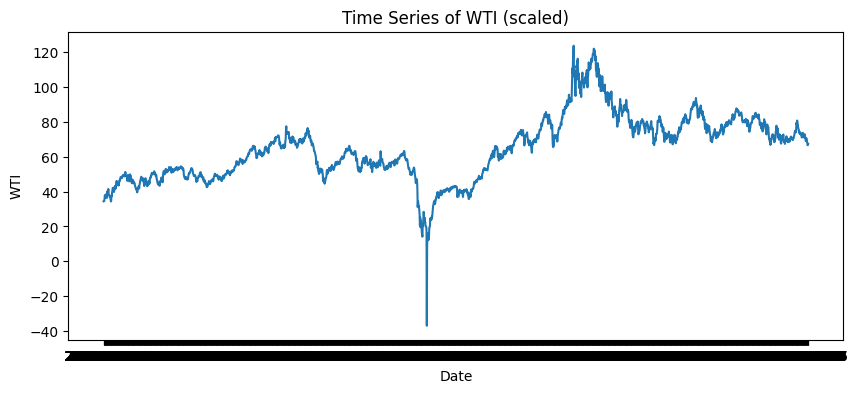

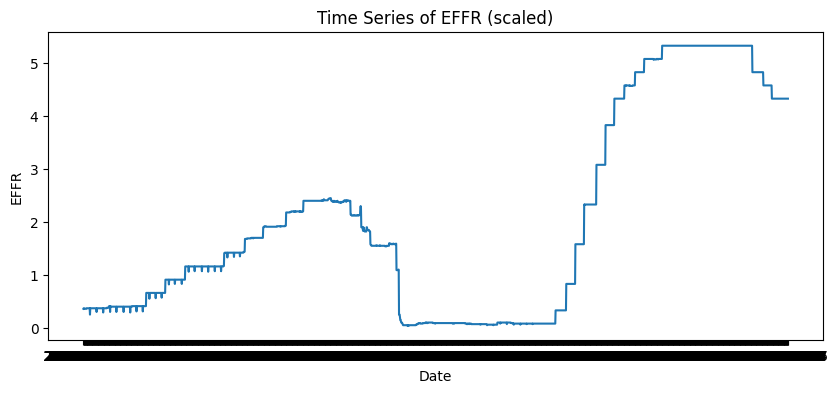

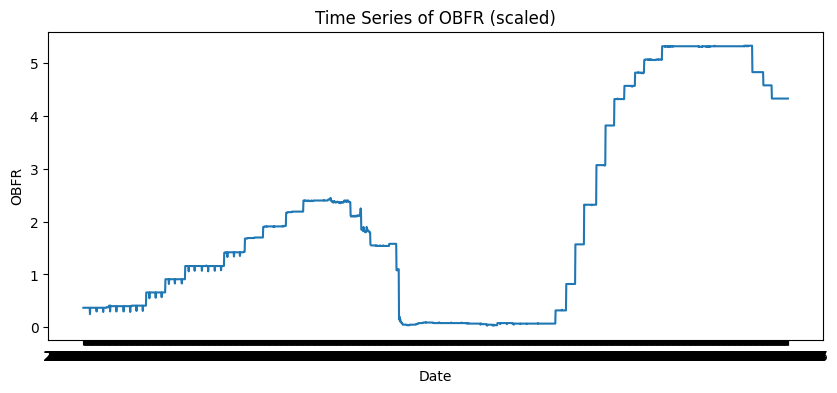

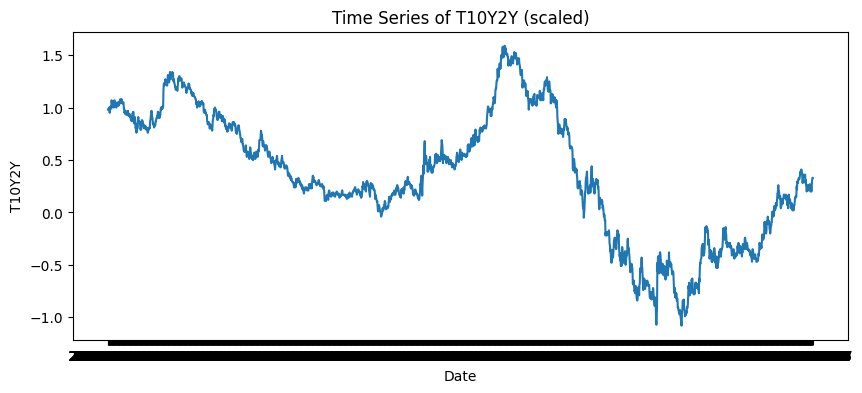

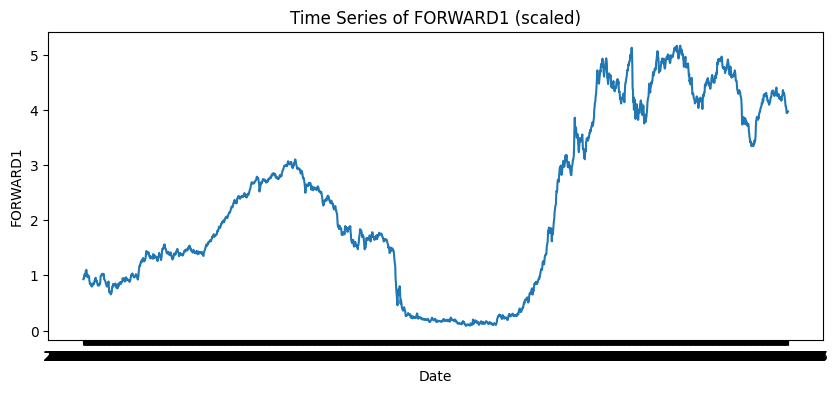

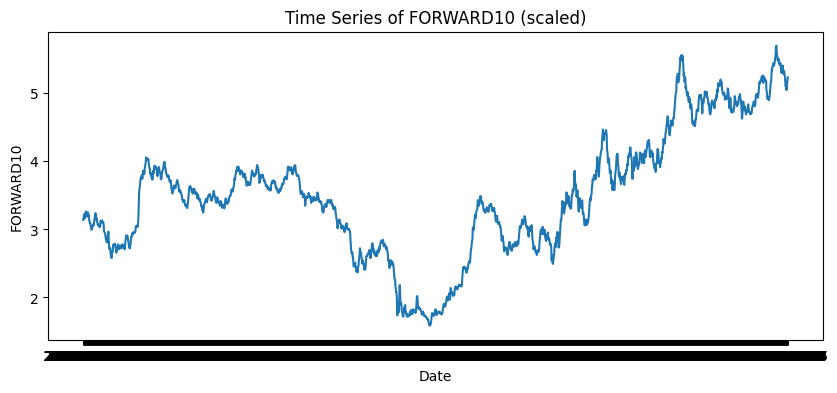

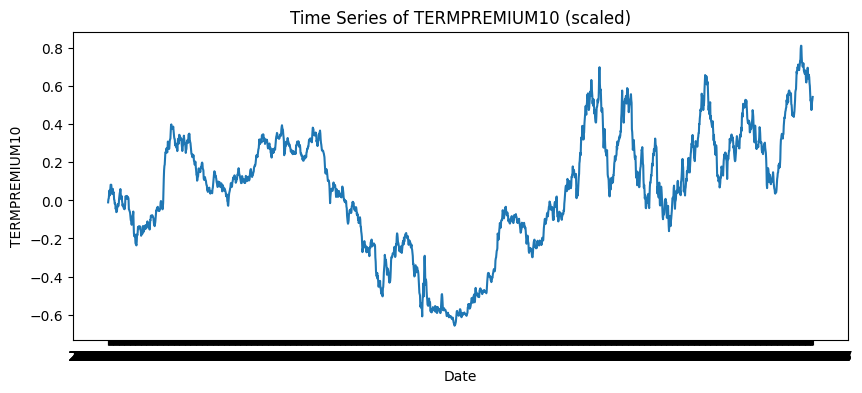

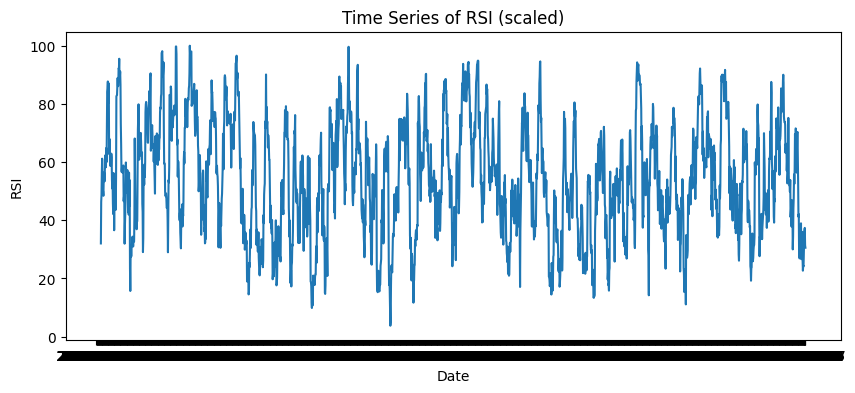

In [41]:
# 각 컬럼에 대해 시계열 선 그래프 그리기
for col in df_scaled.columns:
    plt.figure(figsize=(10,4))
    plt.plot(df.index, df[col])
    plt.title(f'Time Series of {col} (scaled)')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()

In [44]:
# scaling이 정상적으로 된 거 확인했으니 대체
df = df_scaled

In [47]:
# observation_date를 datetime으로 변환하고 인덱스로 설정했다고 가정
df.index = pd.to_datetime(df.index)

# 전체 기간에 대해 일 단위의 인덱스를 생성
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df_full = df.reindex(full_range)
df_full['BTC_lag_7'] = df_full['BTC'].shift(7)
df_full['BTC_lag_2'] = df_full['BTC'].shift(2)
df_full.tail(15)

,BTC,BBB,SP500,SP5003MONVOL,DAAA,WTI,EFFR,OBFR,T10Y2Y,FORWARD1,FORWARD10,TERMPREMIUM10,RSI,RSI14,RSI5,BTC_lag_7,BTC_lag_2
2025-02-21,2.570970,0.770,1.585145,0.133165,1.034014,0.248243,0.803468,0.807246,-0.104938,0.788980,1.673680,1.264179,-0.630885,-0.630885,-0.286777,2.601823,2.624632
2025-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.558047
2025-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.570970
2025-02-24,2.327804,0.760,1.567252,0.181130,1.020408,0.261704,0.803468,0.807246,-0.055556,0.777508,1.654721,1.230114,-0.968167,-0.968167,-0.844656,NaN,NaN
2025-02-25,2.191848,0.720,1.550485,0.202588,0.965986,0.186083,0.803468,0.807246,-0.104938,0.752381,1.581384,1.124372,-1.104418,-1.104418,-0.918788,2.572488,NaN
2025-02-26,2.207456,0.710,1.550970,0.167245,0.938776,0.174998,0.803468,0.807246,-0.141975,0.737769,1.529409,1.048436,-1.041507,-1.041507,-1.067079,2.624632,2.327804
2025-02-27,2.197501,0.720,1.494386,0.352793,0.965986,0.244284,0.803468,0.807246,-0.117284,0.738555,1.541617,1.054350,-1.052519,-1.052519,-1.049083,2.558047,2.191848
2025-02-28,2.249823,0.715,1.550036,0.221521,0.965986,0.218549,0.803468,0.807246,-0.080247,0.719470,1.519791,1.004436,-0.867282,-0.867282,-0.871909,2.570970,2.207456
2025-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.197501
2025-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.249823


In [49]:
# 쓸모없는 column들 제거
df.drop('RSI', axis=1, inplace=True)
df.drop('OBFR', axis = 1, inplace = True)

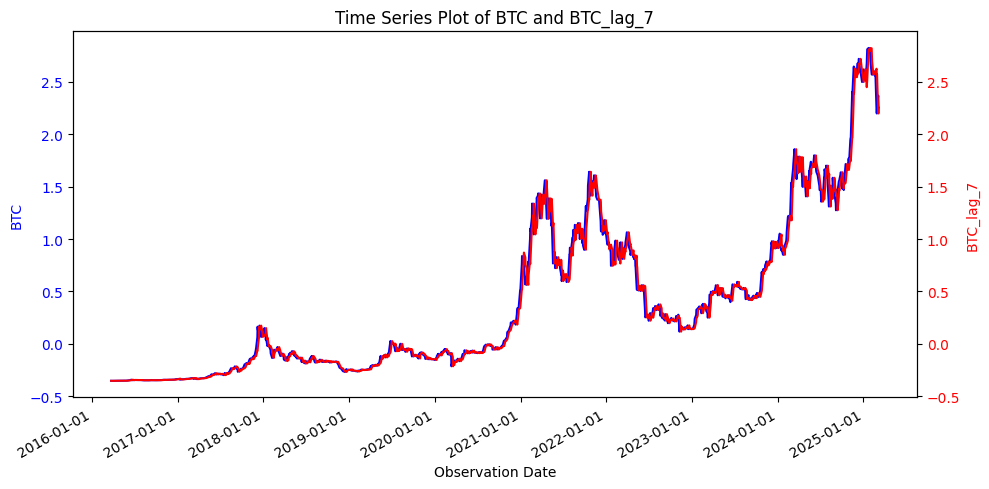

In [46]:
import matplotlib.dates as mdates

df_full_clean = df_full.dropna()

fig, ax1 = plt.subplots(figsize=(10, 5))

# 왼쪽 y축: BTC 데이터 플롯
ax1.plot(df_full_clean.index, df_full_clean['BTC'], 'b-', label='BTC')
ax1.set_xlabel('Observation Date')
ax1.set_ylabel('BTC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# 오른쪽 y축: BTC_lag_k 데이터 플롯
ax2 = ax1.twinx()
ax2.plot(df_full_clean.index, df_full_clean['BTC_lag_7'], 'r-', label='BTC_lag_7')
ax2.set_ylabel('BTC_lag_7', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series Plot of BTC and BTC_lag_7')
fig.tight_layout()
plt.show()

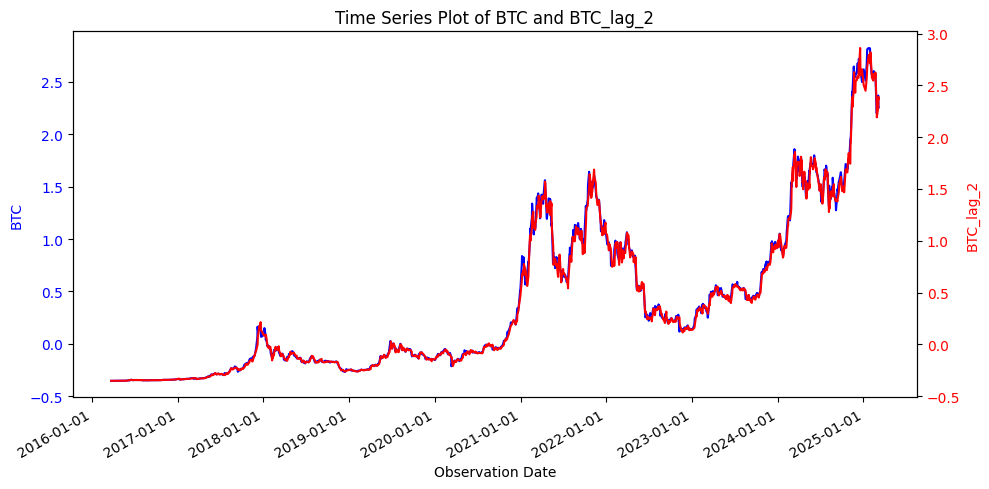

In [48]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# 왼쪽 y축: BTC 데이터 플롯
ax1.plot(df_full_clean.index, df_full_clean['BTC'], 'b-', label='BTC')
ax1.set_xlabel('Observation Date')
ax1.set_ylabel('BTC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# 오른쪽 y축: BTC_lag_k 데이터 플롯
ax2 = ax1.twinx()
ax2.plot(df_full_clean.index, df_full_clean['BTC_lag_2'], 'r-', label='BTC_lag_2')
ax2.set_ylabel('BTC_lag_2', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series Plot of BTC and BTC_lag_2')
fig.tight_layout()
plt.show()

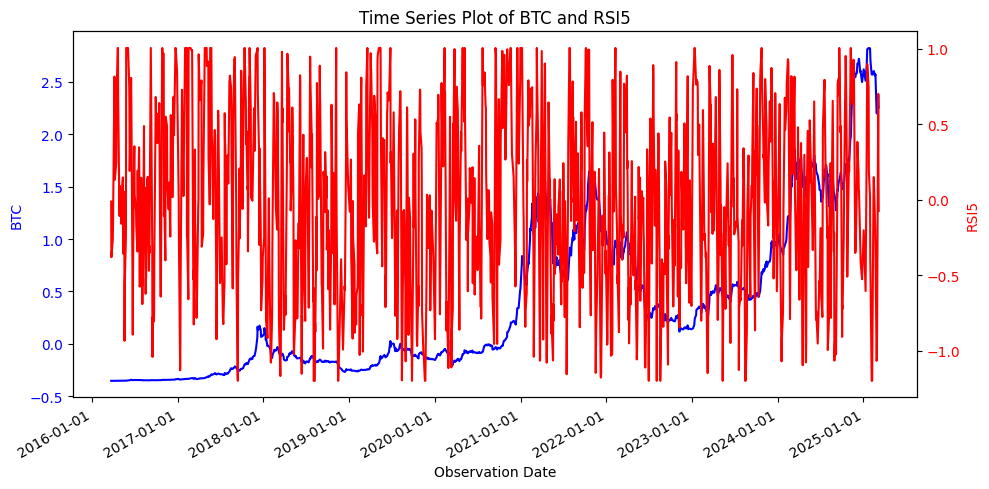

In [51]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# 왼쪽 y축: BTC 데이터 플롯
ax1.plot(df_full_clean.index, df_full_clean['BTC'], 'b-', label='BTC')
ax1.set_xlabel('Observation Date')
ax1.set_ylabel('BTC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# 오른쪽 y축: BTC_lag_k 데이터 플롯
ax2 = ax1.twinx()
ax2.plot(df_full_clean.index, df_full_clean['RSI5'], 'r-', label='RSI5')
ax2.set_ylabel('RSI5', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series Plot of BTC and RSI5')
fig.tight_layout()
plt.show()

- 정리
  - lag변수는 btc의 변동성을 고려해서 단기 및 중기 전부 고려
  - rsi(변동성 측정 지표): 도저히 써먹을 수 없을 듯